In [1]:
# !pip install plotnine

In [2]:
import pandas as pd
from plotnine import *

# %matplotlib inline

In [3]:
temps_long = pd.read_csv("temps_long.csv")
temps_long

,station_id,month,day,temperature,flag,date,location
0,USC00042319,1,1,51.0,S,0-01-01,Death Valley
1,USC00042319,1,2,51.2,S,0-01-02,Death Valley
2,USC00042319,1,3,51.3,S,0-01-03,Death Valley
3,USC00042319,1,4,51.4,S,0-01-04,Death Valley
4,USC00042319,1,5,51.6,S,0-01-05,Death Valley
...,...,...,...,...,...,...,...
1459,USW00093107,12,27,55.0,S,0-12-27,San Diego
1460,USW00093107,12,28,55.0,S,0-12-28,San Diego
1461,USW00093107,12,29,55.1,S,0-12-29,San Diego
1462,USW00093107,12,30,55.1,S,0-12-30,San Diego


In [4]:
temps_long['date'] = '199' + temps_long['date'].astype(str)
temps_long["date"] = pd.to_datetime(temps_long["date"],format="%Y-%m-%d",errors = 'coerce')
temps_long

,station_id,month,day,temperature,flag,date,location
0,USC00042319,1,1,51.0,S,1990-01-01,Death Valley
1,USC00042319,1,2,51.2,S,1990-01-02,Death Valley
2,USC00042319,1,3,51.3,S,1990-01-03,Death Valley
3,USC00042319,1,4,51.4,S,1990-01-04,Death Valley
4,USC00042319,1,5,51.6,S,1990-01-05,Death Valley
...,...,...,...,...,...,...,...
1459,USW00093107,12,27,55.0,S,1990-12-27,San Diego
1460,USW00093107,12,28,55.0,S,1990-12-28,San Diego
1461,USW00093107,12,29,55.1,S,1990-12-29,San Diego
1462,USW00093107,12,30,55.1,S,1990-12-30,San Diego


In [6]:
temps_long.dtypes

station_id             object
month                   int64
day                     int64
temperature           float64
flag                   object
date           datetime64[ns]
location               object
dtype: object

In [7]:
from datetime import datetime

/opt/conda/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


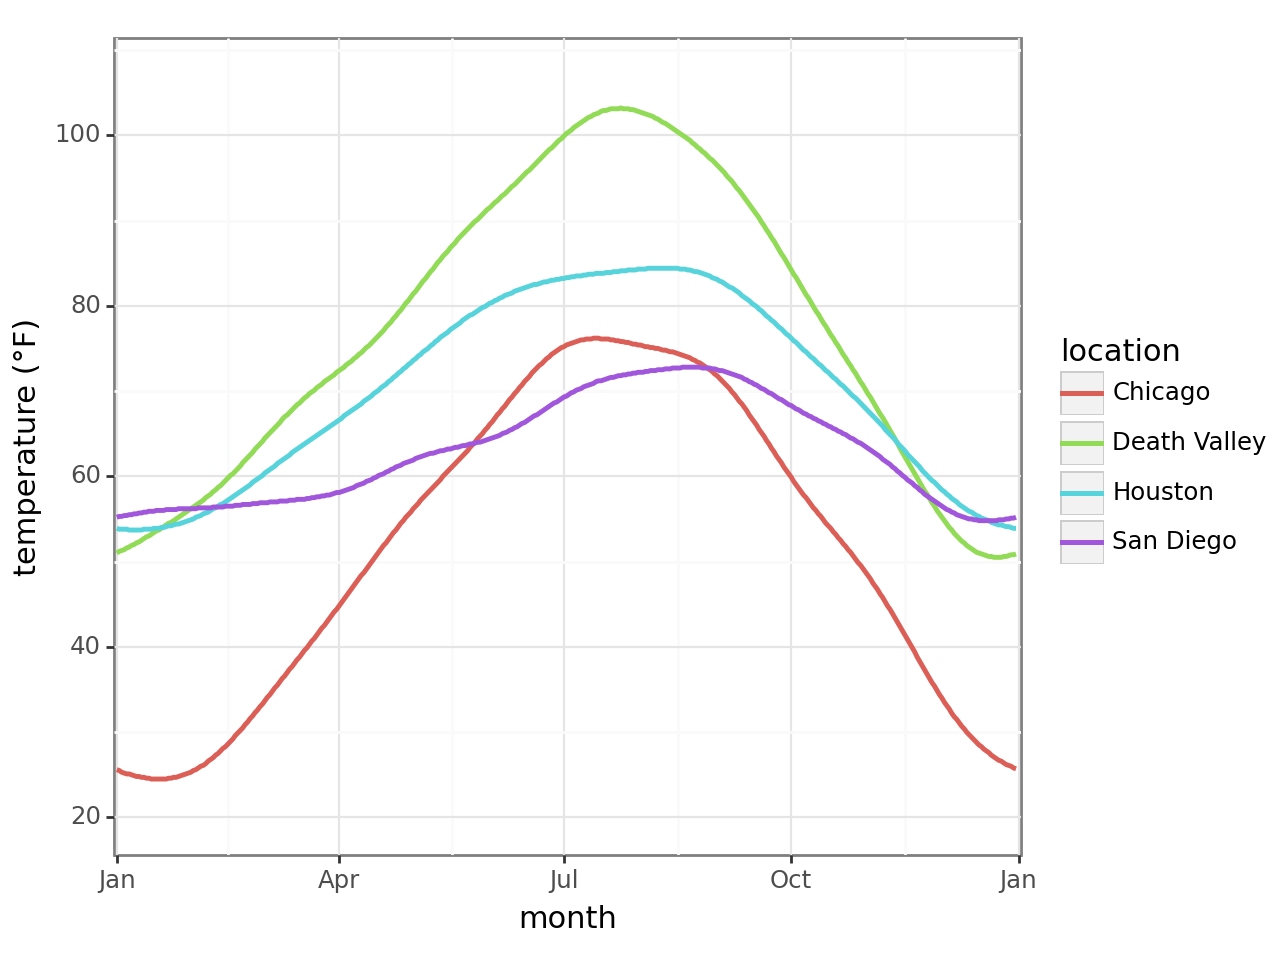

<Figure Size: (640 x 480)>

In [8]:
(
    ggplot(temps_long, aes(x = 'date', y = 'temperature', color = 'location')) +
    geom_line(size = 1) +
  # geom_line(linewidth = 1) +
  scale_x_datetime(name = "month", 
                   limits = [datetime.strptime("1990-01-01", '%Y-%m-%d'), datetime.strptime("1991-01-01", '%Y-%m-%d')],
                   breaks = [datetime.strptime("1990-01-01", '%Y-%m-%d'), datetime.strptime("1990-04-01", '%Y-%m-%d'), 
                             datetime.strptime("1990-07-01", '%Y-%m-%d'),
                             datetime.strptime("1990-10-01", '%Y-%m-%d'), datetime.strptime("1991-01-01", '%Y-%m-%d')],
                   labels = ["Jan", "Apr", "Jul", "Oct", "Jan"], 
                   expand = [1/366, 0]
                  ) + 
  scale_y_continuous(limits = [19.9, 107],
                     breaks = [20,40,60,80,100],
                     name = "temperature (°F)") +
    theme_bw()
  # scale_color_OkabeIto(order = c(1:3, 7), name = NULL) +
  # theme_dviz_grid() +
  # theme(legend.title.align = 0.5)
)